introduce data and time

In [1]:
#import 
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import math

In [2]:
google=pd.read_csv('C:/Users/zhouteng/new/Time series/8388_11883_bundle_archive/GOOGL_2006-01-01_to_2018-01-01.csv',
                  index_col='Date',
                  parse_dates=['Date']#将某列解析为时间索引
                 )
AU=pd.read_csv(
    filepath_or_buffer='C:/Users/zhouteng/new/DL_pytorch/data/AU08-20.csv',
    sep=',', # 数据分割符，csv默认为“，”，此处可不加，其他格式多为'\t'
    skiprows=1,  # 跳过文件第1行不读入
#     nrows=20,   # 只读取前n行
    parse_dates=['Date'],  # 将指定的某几列数据识别为日期格式，不指定则默认以字符串方式读入
    index_col=['Date'],  # 将指定列设为index,否则默认为0开始的序列
)
AG5m=pd.read_csv('C:/Users/zhouteng/new/Time series/auag5m/auag5m.csv',index_col='Date',
                  parse_dates=['Date'])

In [9]:
google


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


In [12]:
AU

,pre_close,open,high,low,close
Date,,,,,
2008-01-09,#NAME?,230.95,230.99,221.88,223.30
2008-01-10,223.3,222.50,222.85,213.70,215.12
2008-01-11,215.12,218.00,219.23,215.50,218.10
2008-01-14,218.1,218.85,220.25,217.60,220.10
2008-01-15,220.1,220.70,224.60,220.30,223.80
...,...,...,...,...,...
2020-12-29,395.78,394.40,398.44,393.38,393.86
2020-12-30,393.86,394.16,395.28,392.14,393.70
2020-12-31,393.7,393.40,397.68,392.64,394.98


In [22]:
AG5m

,close
Date,
2015010509:10:00,240.94
2015010509:20:00,240.92
2015010509:25:00,240.92
2015010509:30:00,240.92
2015010509:35:00,240.76
...,...
2021012611:00:00,390.84
2021012611:05:00,391.16
2021012611:10:00,390.88


<Figure size 432x288 with 0 Axes>

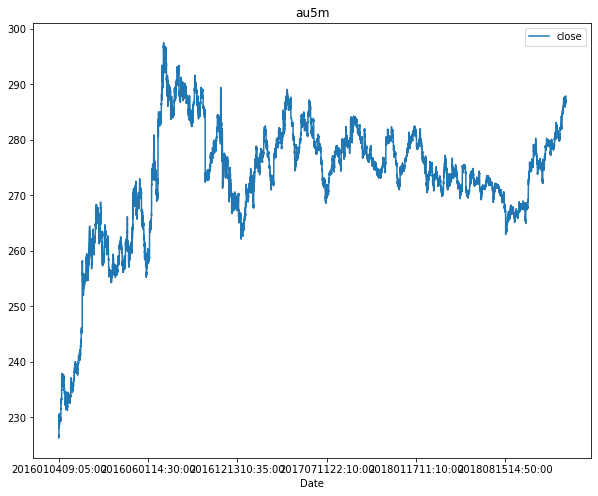

In [23]:
plt.figure()
AG5m['2016':'2019'].plot(figsize=(10,8)) #figsize（宽*高）
plt.title('au5m')
plt.show()

In [24]:
AG5m = AG5m.fillna(method='ffill') #缺值向上填充

In [25]:
AG5m

,close
Date,
2015010509:10:00,240.94
2015010509:20:00,240.92
2015010509:25:00,240.92
2015010509:30:00,240.92
2015010509:35:00,240.76
...,...
2021012611:00:00,390.84
2021012611:05:00,391.16
2021012611:10:00,390.88


In [5]:
a=google.High.shift() #下移一行
print(a)

Date
2006-01-03        NaN
2006-01-04     218.05
2006-01-05     224.70
2006-01-06     226.00
2006-01-09     235.49
               ...   
2017-12-22    1077.52
2017-12-26    1071.72
2017-12-27    1068.86
2017-12-28    1068.27
2017-12-29    1064.84
Name: High, Length: 3019, dtype: float64


Date
2006-01-03         NaN
2006-01-04    1.030498
2006-01-05    1.005785
2006-01-06    1.041991
2006-01-09    1.006157
                ...   
2017-12-22    0.994617
2017-12-26    0.997331
2017-12-27    0.999448
2017-12-28    0.996789
2017-12-29    0.993623
Name: change, Length: 3019, dtype: float64


<AxesSubplot:xlabel='Date'>

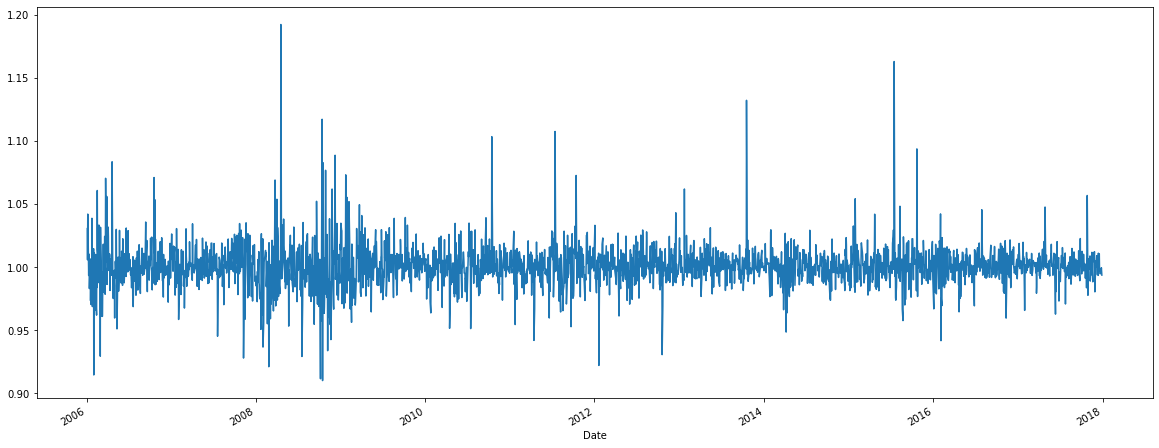

In [11]:
google['change']=google.High.div(a) #high 变化率=今/昨
print(google['change'])
google['change'].plot(figsize=(20,8)) 

Date
2006-01-03         NaN
2006-01-04    3.049759
2006-01-05    0.578549
2006-01-06    4.199115
2006-01-09    0.615737
                ...   
2017-12-22   -0.538273
2017-12-26   -0.266861
2017-12-27   -0.055199
2017-12-28   -0.321080
2017-12-29   -0.637654
Name: return, Length: 3019, dtype: float64


<AxesSubplot:xlabel='Date'>

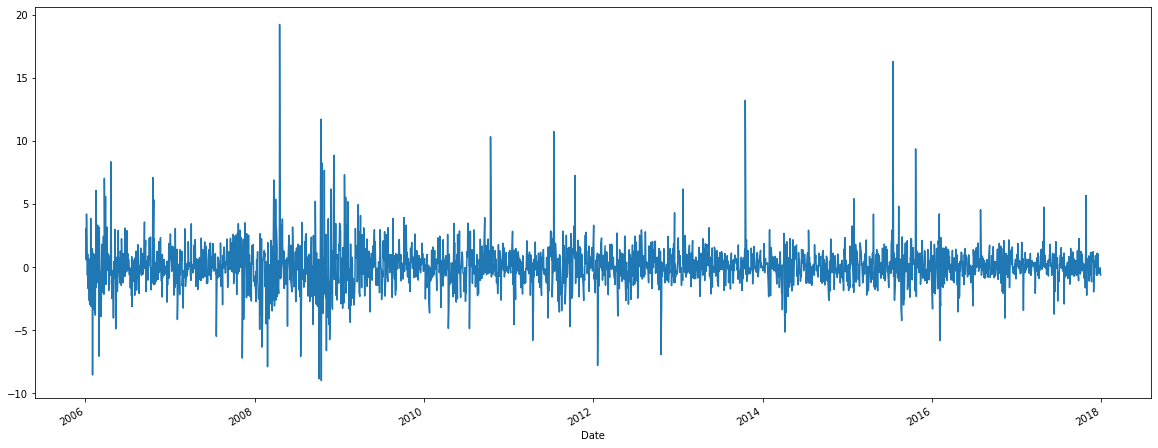

In [10]:
# 收益率
google['return']=google['change'].sub(1).mul(100) #变化率-1 *100 每日收益率
print(google['return'])
google['return'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

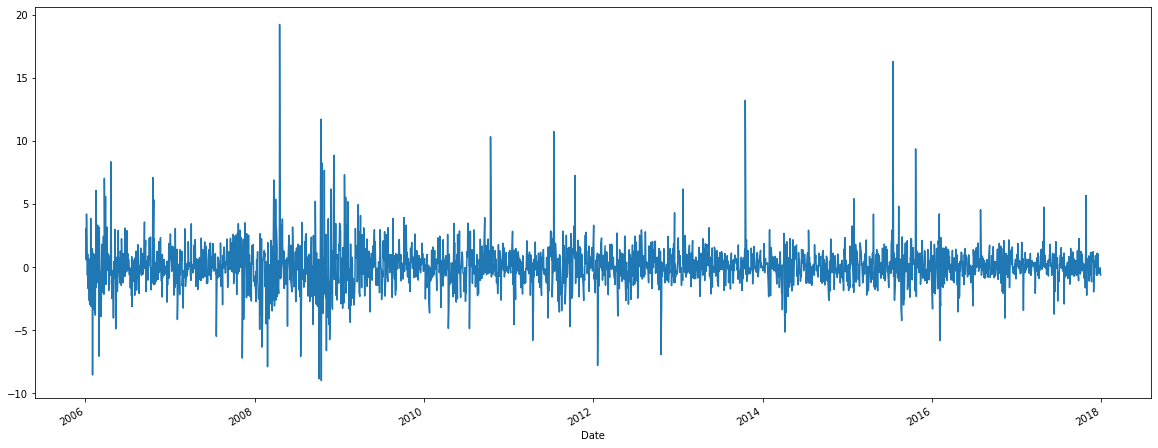

In [19]:
#pct_change当前元素与先前元素的相差百分比 方法2
google.High.pct_change().mul(100).plot(figsize=(20,8)) 

In [3]:
au=AU[['open','high','low','close']]
#使用收盘价计算黄金每日收益率 
au['change']=au['close'].div(au['close'].shift()) 
au['return']=au['change'].sub(1).mul(100)
# 等价于au.close.pct_change().mul(100)
au

,open,high,low,close,change,return
Date,,,,,,
2008-01-09,230.95,230.99,221.88,223.30,NaN,NaN
2008-01-10,222.50,222.85,213.70,215.12,0.963368,-3.663233
2008-01-11,218.00,219.23,215.50,218.10,1.013853,1.385273
2008-01-14,218.85,220.25,217.60,220.10,1.009170,0.917011
2008-01-15,220.70,224.60,220.30,223.80,1.016811,1.681054
...,...,...,...,...,...,...
2020-12-29,394.40,398.44,393.38,393.86,0.995149,-0.485118
2020-12-30,394.16,395.28,392.14,393.70,0.999594,-0.040624
2020-12-31,393.40,397.68,392.64,394.98,1.003251,0.325121


<AxesSubplot:xlabel='Date'>

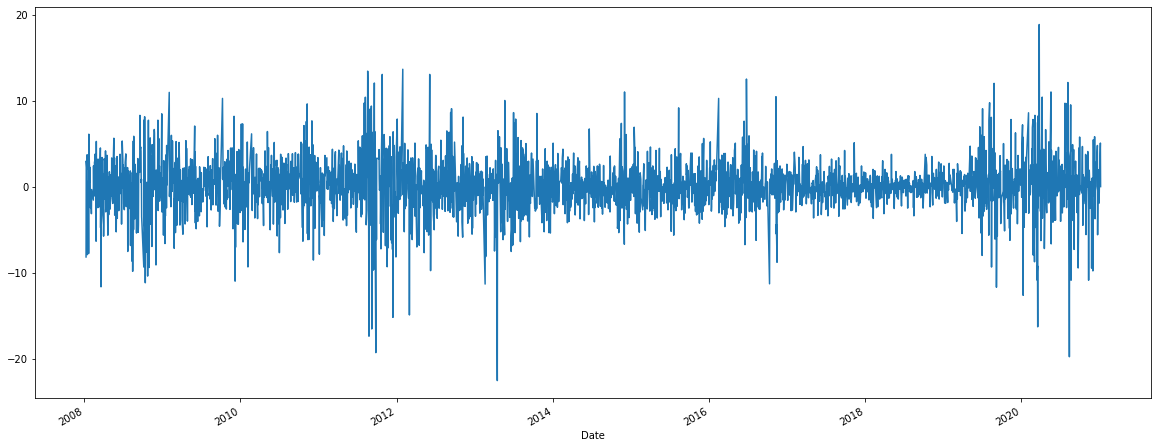

In [36]:
#计算绝对收益
au.close.diff().plot(figsize=(20,8)) #diff()等价于df.shift()-df

In [22]:
ge=pd.read_csv('C:/Users/zhouteng/new/Time series/8388_11883_bundle_archive/GE_2006-01-01_to_2018-01-01.csv',
                  index_col='Date',
                  parse_dates=['Date']
)
ge

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,35.10,35.40,34.80,35.37,33221400,GE
2006-01-04,35.35,35.40,35.10,35.32,24017300,GE
2006-01-05,35.27,35.35,35.10,35.23,18860400,GE
2006-01-06,35.38,35.53,35.19,35.47,22085300,GE
2006-01-09,35.40,35.43,35.24,35.38,20716900,GE
...,...,...,...,...,...,...
2017-12-22,17.51,17.56,17.40,17.50,46370351,GE
2017-12-26,17.45,17.66,17.40,17.43,55337926,GE
2017-12-27,17.46,17.63,17.31,17.38,60126681,GE


<ipython-input-24-385b9202de5b>:4: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('google','ge')
<ipython-input-24-385b9202de5b>:4: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('google','ge')


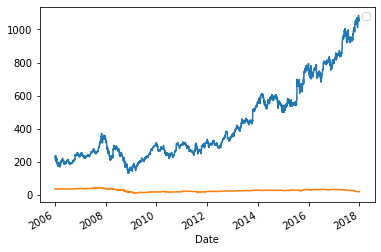

In [24]:
google.Close.plot()
ge.Close.plot()
plt.legend('google','ge')
plt.show()

<ipython-input-25-fae99291d936>:4: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('google','ge')
<ipython-input-25-fae99291d936>:4: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('google','ge')


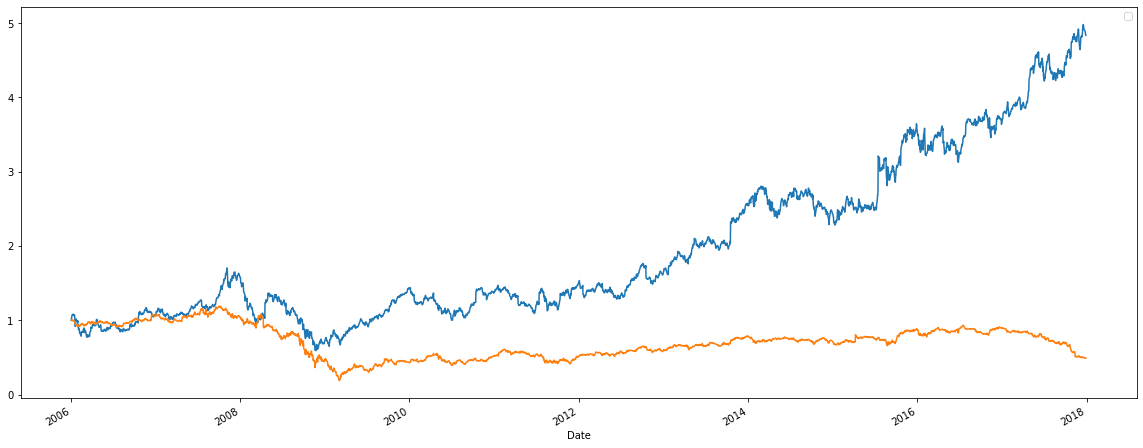

In [25]:
#简单归一化（每个元素除了第一个元素）后对比两个时间序列
google.Close.div(google.at['2006-01-03','Close']).plot(figsize=(20,8)) #div(google.iloc[0])等价
ge.Close.div(ge.at['2006-01-03','Close']).plot(figsize=(20,8))
plt.legend('google','ge')
plt.show()

<ipython-input-26-90f6fd5ae7c1>:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('rolling_g','google')
<ipython-input-26-90f6fd5ae7c1>:6: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('rolling_g','google')
<ipython-input-26-90f6fd5ae7c1>:6: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('rolling_g','google')
<ipython-input-26-90f6fd5ae7c1>:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/

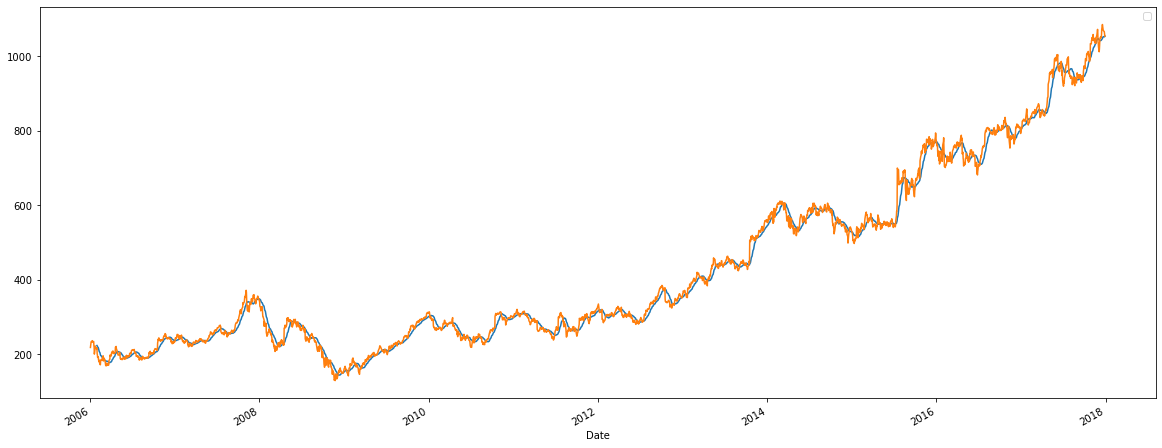

In [26]:
#窗口函数 rolling expanding 
#滚动窗口 滚动窗口计算 按指定周期计算，如2周期求和
rolling_google=google.Close.rolling(20).mean() #滚动窗口取20天均值
rolling_google.plot(figsize=(20,8))
google.Close.plot(figsize=(20,8))
plt.legend('rolling_g','google')
plt.show()

<ipython-input-27-fa5476a3218d>:5: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('expanding_g','google')
<ipython-input-27-fa5476a3218d>:5: UserWarning: Legend does not support 'x' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('expanding_g','google')
<ipython-input-27-fa5476a3218d>:5: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('expanding_g','google')
<ipython-input-27-fa5476a3218d>:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotli

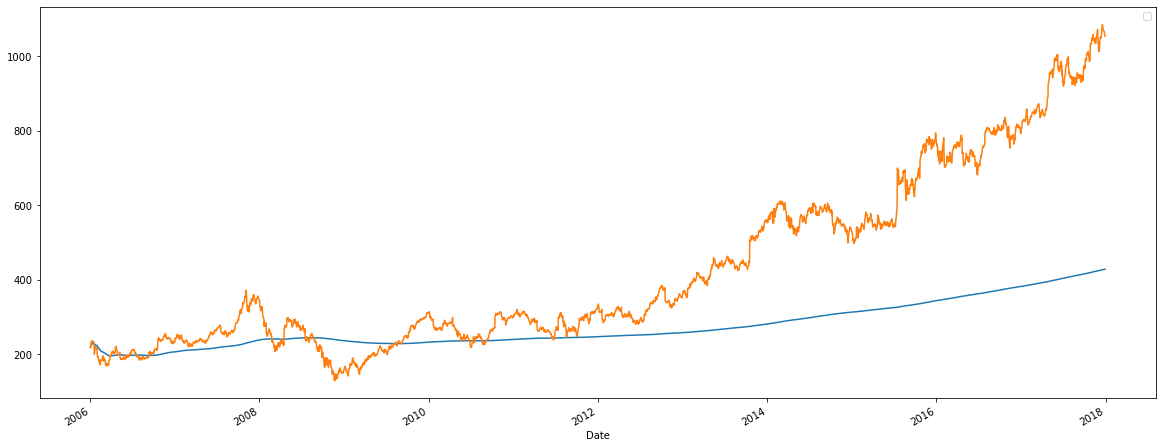

In [27]:
#expanding 提供扩展转换。累计计算，如累加求和
expanding_google=google.Close.expanding().mean() #累加取均值
expanding_google.plot(figsize=(20,8))
google.Close.plot(figsize=(20,8))
plt.legend('expanding_g','google')
plt.show()

<ipython-input-37-d26d8f7e4a6f>:4: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('rolling_a','au')
<ipython-input-37-d26d8f7e4a6f>:4: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('rolling_a','au')


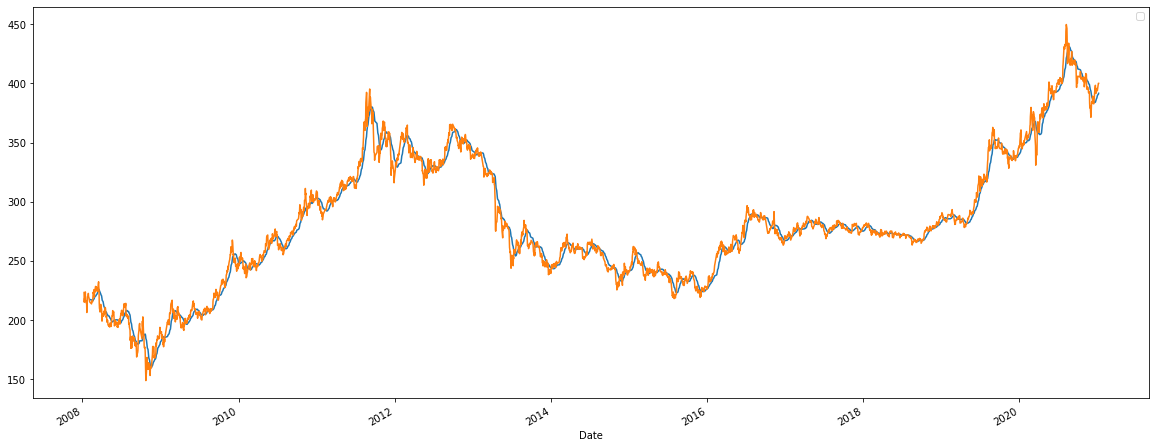

In [37]:
rolling_au=au.close.rolling(20).mean() #au20日均线
rolling_au.plot(figsize=(20,8))
au['close'].plot(figsize=(20,8))
plt.legend('rolling_a','au')
plt.show()

自相关图和偏自相关图

自相关性检验：自相关性考察的是 t 时刻的值和距当前任意间隔 k时刻的值之间的线性相依关系，t时刻与t-k时刻的自相关系数，k即为滞后值

自相关系数（-1，1）


In [4]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

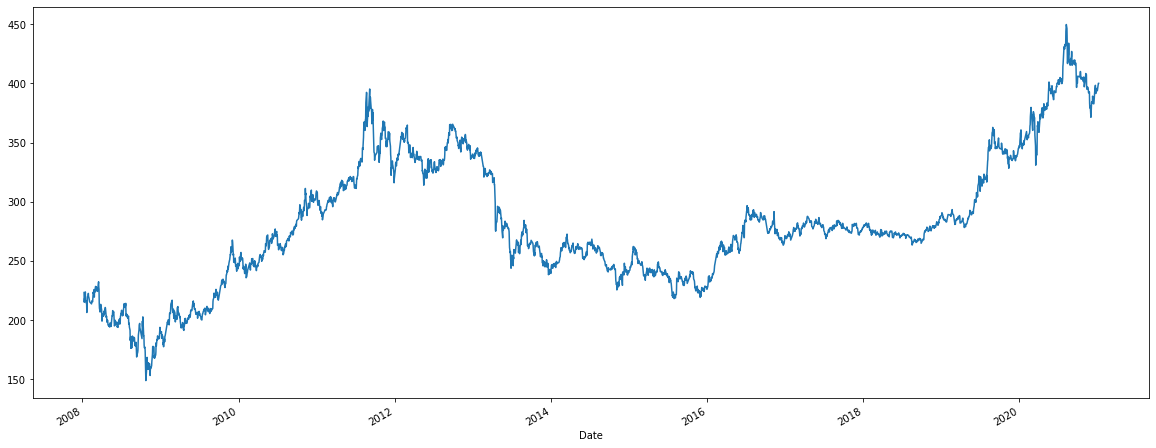

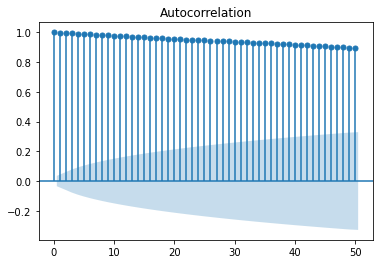

In [60]:
#自相关图
au['close'].plot(figsize=(20,8))
plot_acf(au['close'],lags=50)
plt.show()

存在趋势性

自相关函数 (ACF):延迟为 k 时，这是相距 k 个时间间隔的序列值之间的相关性
偏自相关:延迟为 k 时，这是相距 k 个时间间隔的序列值之间的相关性，同时考虑了间隔之间的值。

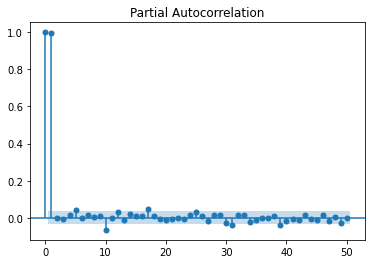

In [63]:
#偏自相关图
plot_pacf(au['close'],lags=50)
plt.show()

除间隔最小序列之外，偏相关性图，逐渐类似随机噪声，相关函数接近0。蓝色的阴影区域为95% 的置信区间。因此，自相关系数只要没有超过蓝色阴影区域，我们就无法在 5% 的显著性水平下拒绝原假设（原假设为间隔为k的自相关系数为 0）。上图的结果说明当k 不为 0 时，随机噪声的自相关系数为 0。

趋势 季节性 序列分解

In [5]:
from pylab import rcParams
import statsmodels.api as sm

<ipython-input-23-3d268755c191>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposed_au_volume = sm.tsa.seasonal_decompose(au["close"],freq=360) # The frequncy is annual


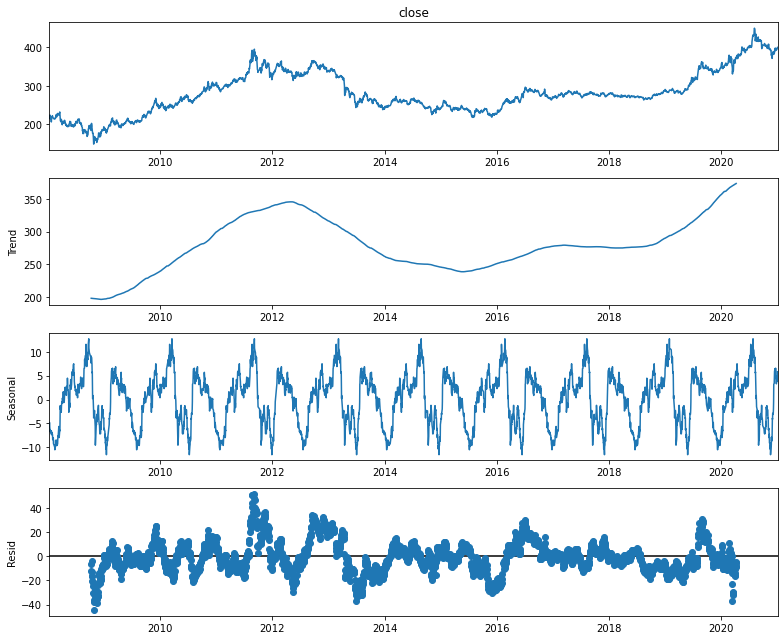

In [23]:
rcParams['figure.figsize'] = 11, 9 #使用自定义配置文件修改图片大小
#时序数据分离成不同的成分，分解有：长期趋势Trend、季节性seasonality和随机残差residuals
decomposed_au_volume = sm.tsa.seasonal_decompose(au["close"],freq=360) # The frequncy is annual
# decomposed_au_volume.plot(figsize=(11,9))  该类型无法设置figsize
figure=decomposed_au_volume.plot() 
plt.savefig('序列分解结果.png')
plt.show()

<AxesSubplot:xlabel='Date'>

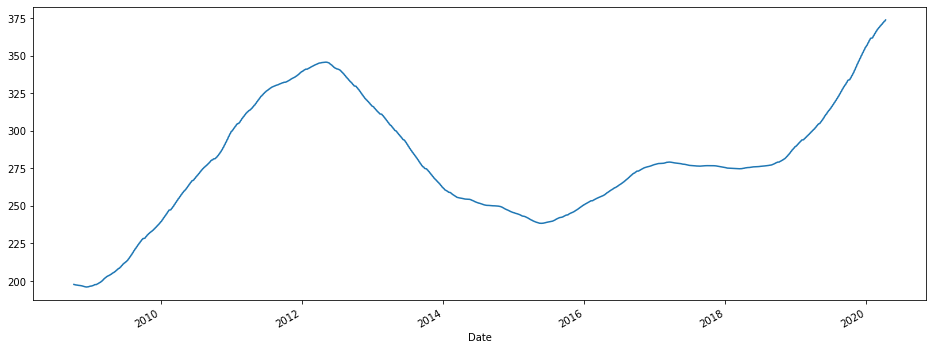

In [21]:
decomposed_au_volume.trend.plot()

有相应趋势和统一的季节性特征

白噪声和随机游走

白噪声：均值为0，方差为1，自相关系数为0

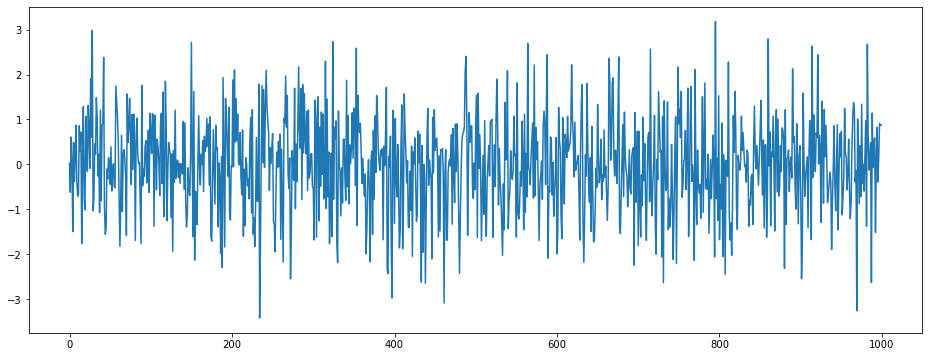

In [14]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

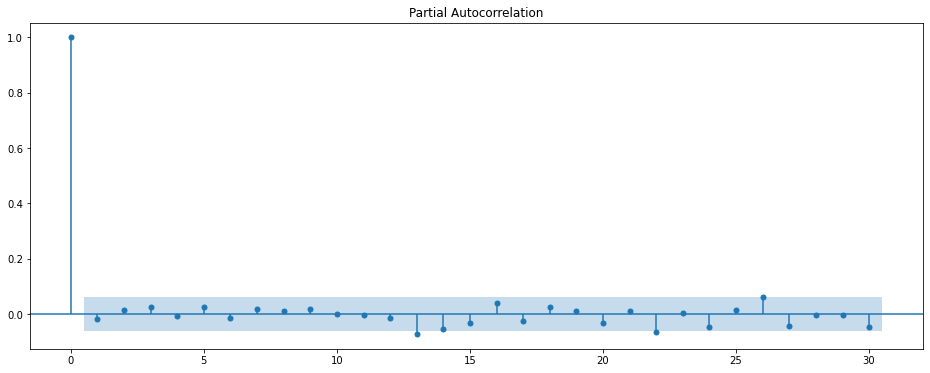

In [18]:
plot_pacf(white_noise)
plt.show()

ADF检验 检验是否平稳or检验是否为随机游走。

In [20]:
adf = adfuller(au["close"])
print("p-value of au: {}".format(float(adf[1])))

p-value of au: 0.8262604818566124


p值大于0.05，拒绝原假设，非随机游走

AR模型 :随机差分方差分方程阶数即为lag

一阶AR模型：Rt = μ + ϕRt-1 + εt

μ为均值，εt为t时刻噪声

If ϕ = 1, 为随机游走. Else if ϕ = 0, 为白噪声. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

二阶AR：Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

1阶MA模型：Rt = μ + ϵt1 + θϵt-1

当前的return等于均值+当前的噪声+过去的噪声

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

构建模拟ARMA模型

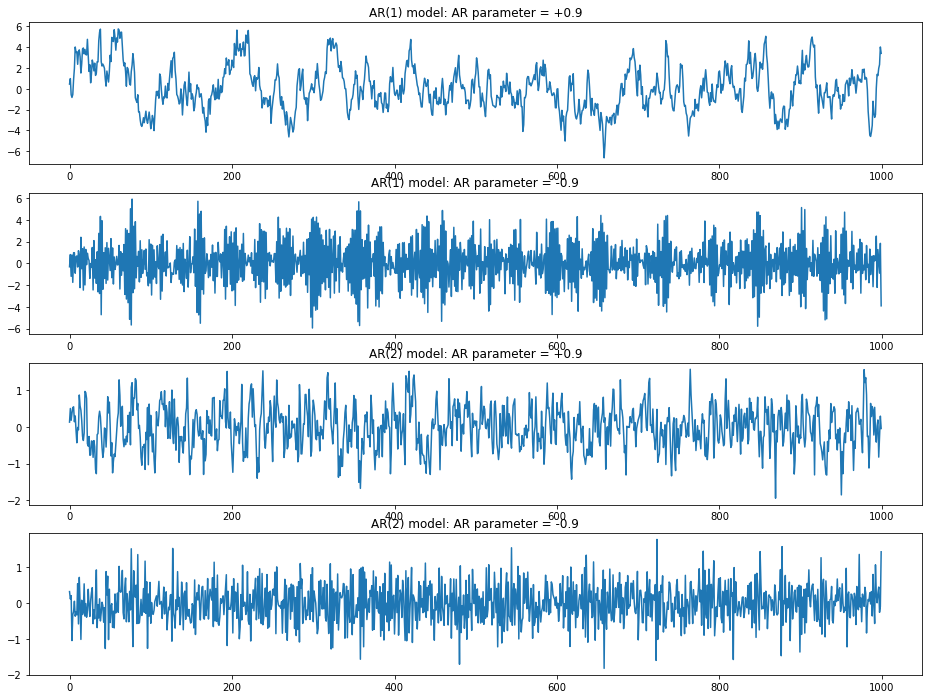

In [7]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
#绘制子图 4行*1列，子图序号为1
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9 一阶AR
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
#构建理论ARMA过程
sim1 = AR1.generate_sample(nsample=1000)
#样本数1000
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
#构建ARMA过程样本为1000
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [8]:
#预测
model = ARMA(sim1, order=(1,0))
#order=(p,q)
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

C:\Users\zhouteng\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1367.215
Method:                       css-mle   S.D. of innovations              0.949
Date:                Wed, 03 Feb 2021   AIC                           2740.431
Time:                        15:07:48   BIC                           2755.154
Sample:                             0   HQIC                          2746.027
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1422      0.275      0.517      0.605      -0.397       0.682
ar.L1.y        0.8918      0.014     62.484      0.000       0.864       0.920
                                    Roots           

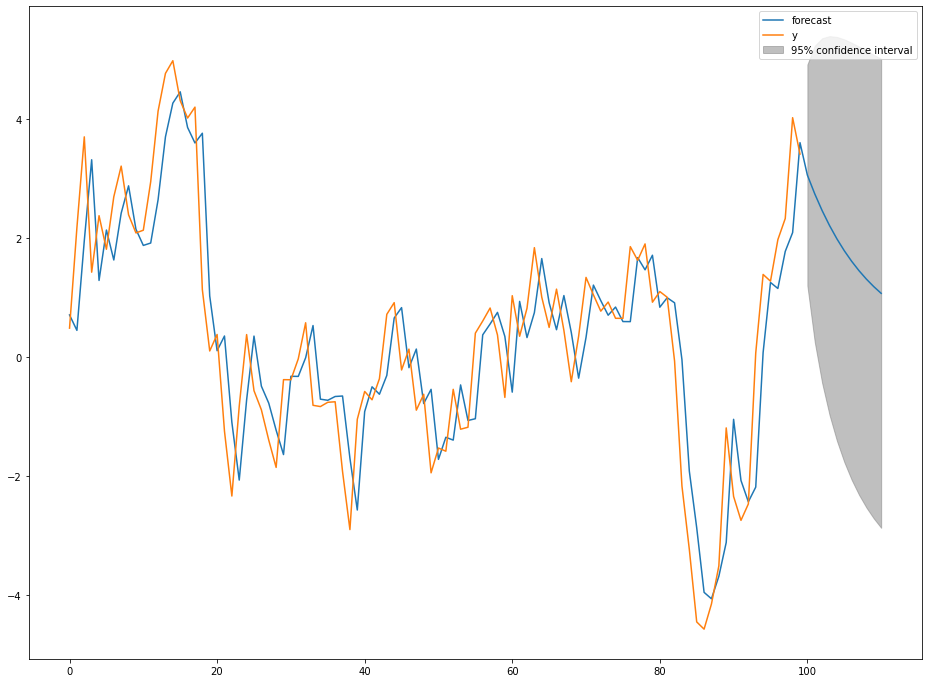

In [9]:
result.plot_predict(start=900, end=1010)
plt.show()

In [10]:
#预测误差取均方根误差
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.9620776419596546.


ARMA使用前提：数据满足平稳性和非白噪声，使用n阶差分和混动移动平均来实现平稳性，使用ADF检验平稳性

ARMA模型：Rt = μ + ϕRt-1 + ϵt + θϵt-1

Today's return = mean + Yesterday's return + noise + yesterday's noise.

ARMA构建的核心：如何确定pq。ACF和PACF图看图方式用来确定模型的阶数（p,q），或者使用信息准则定阶：AIC、BIC、HQIC，或者热力图

1、差分 检验平稳性

Date
2008-01-10   -8.18
2008-01-11    2.98
2008-01-14    2.00
2008-01-15    3.70
2008-01-16   -7.91
              ... 
2020-12-29   -1.92
2020-12-30   -0.16
2020-12-31    1.28
2021-01-04    5.06
2021-01-05    0.00
Name: close, Length: 3160, dtype: float64


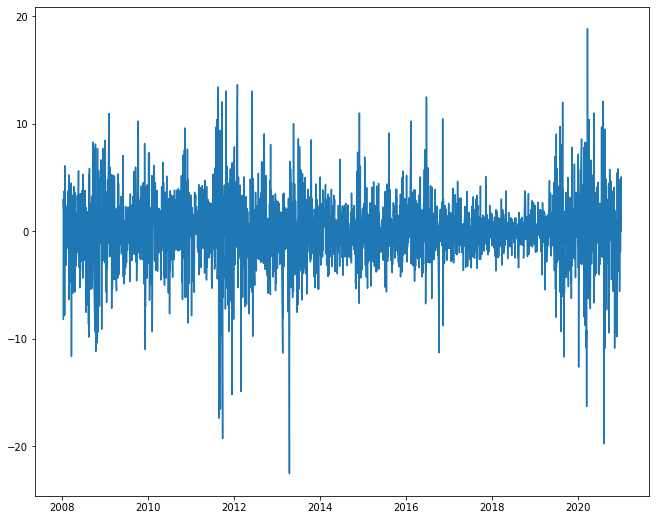

In [18]:
#使用一阶差分
diff1=au['close'].diff(1).iloc[1:]
plt.plot(diff1)
print(diff1)

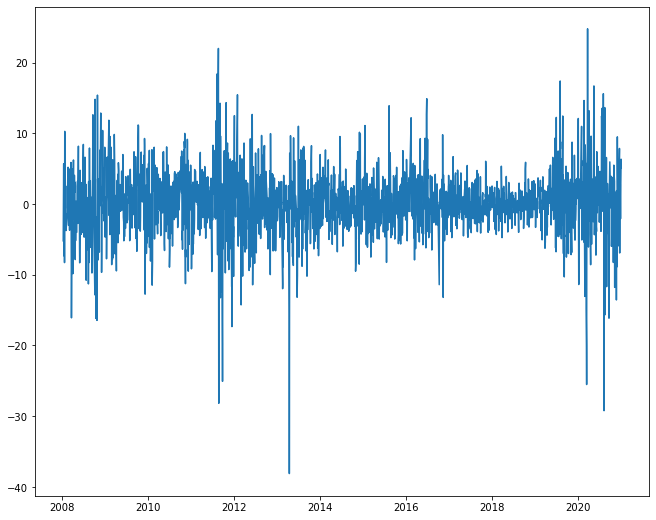

In [11]:
#检查二阶差分
diff2=au['close'].diff(2).iloc[1:]
plt.plot(diff2)

含趋势 非平稳时间序列。。一阶差分稍好

2、ADF平稳性检验

In [24]:
adftest=adfuller(diff1)
print(adftest)

(-15.13837701273186, 7.068375192940423e-28, 15, 3144, {'1%': -3.432431630755232, '5%': -2.8624597362413495, '10%': -2.5672595971526198}, 15857.46085571607)


ADF结果小于1% 5% 10%值，且p值接近零，平稳

3、模型定阶

ACF图确定阶数 ACF截尾获得P值，PACF截尾获得Q值
热力图确定阶数（计算AIC定阶）

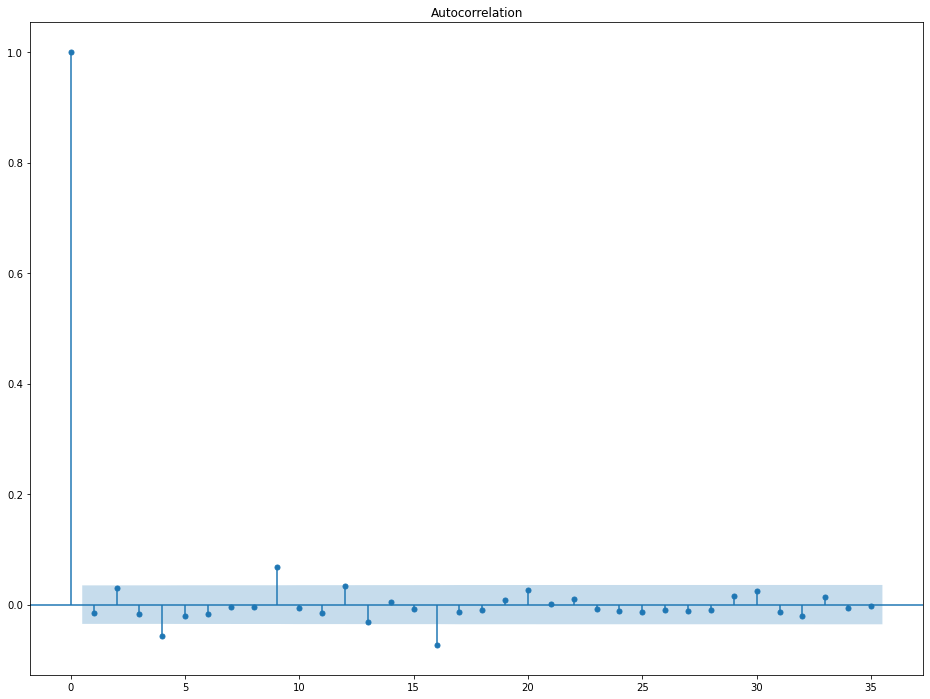

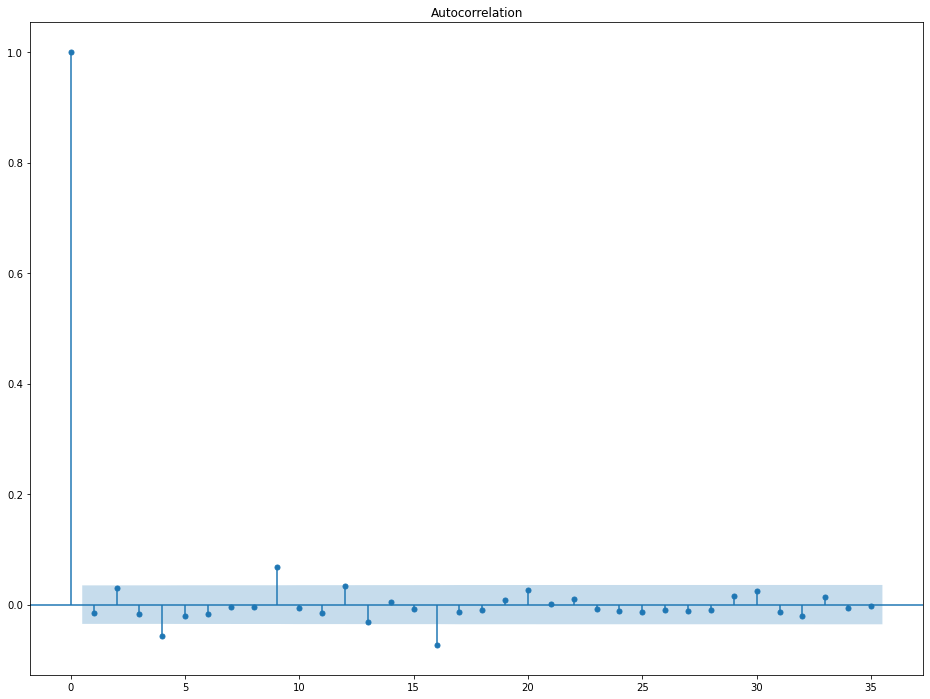

In [30]:
plot_acf(diff1)

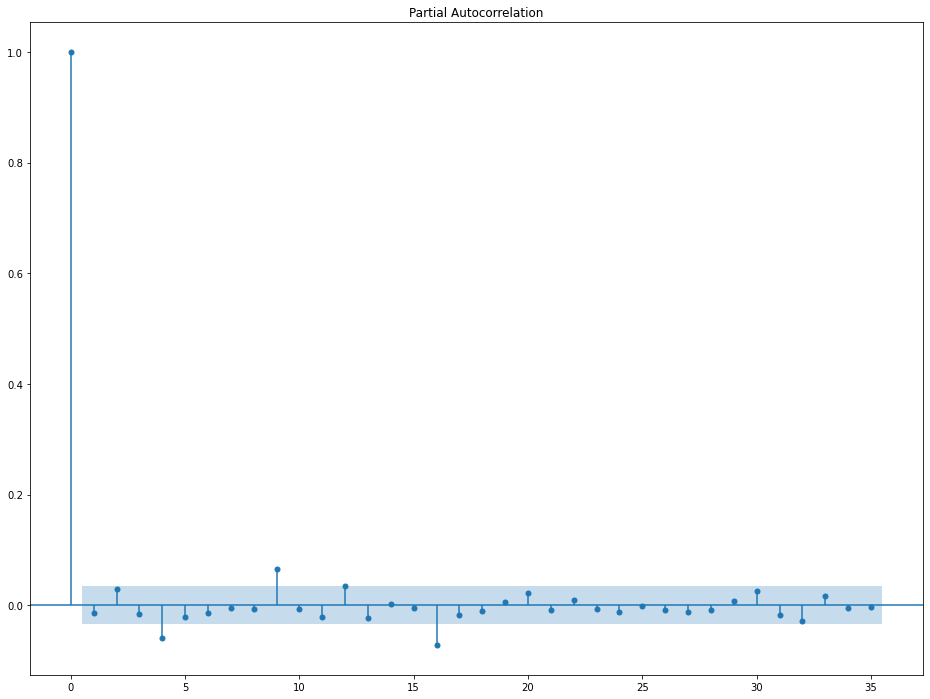

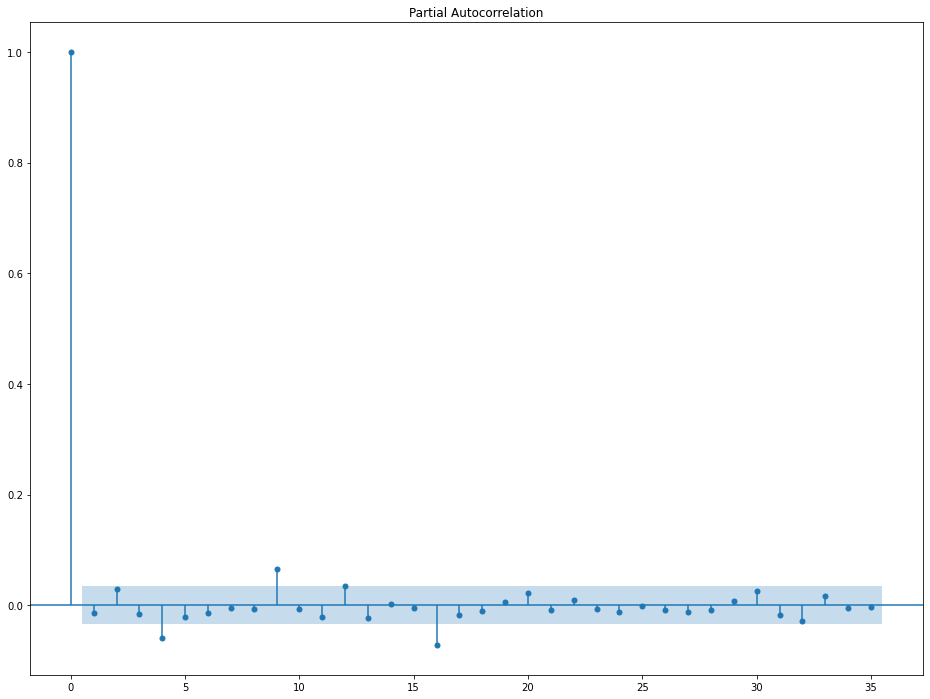

In [31]:
plot_pacf(diff1)

p值取4，q值取4 4阶之后在置信区间内（？）

4、ARMA进行预测

C:\Users\zhouteng\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\zhouteng\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 3160
Model:                     ARMA(4, 4)   Log Likelihood               -8014.707
Method:                       css-mle   S.D. of innovations              3.057
Date:                Mon, 08 Feb 2021   AIC                          16049.414
Time:                        10:03:07   BIC                          16109.997
Sample:                             0   HQIC                         16071.148
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0558      0.046      1.200      0.230      -0.035       0.147
ar.L1.close    -0.4873      0.266     -1.833      0.067      -1.008       0.034
ar.L2.close     0.0559      0.169      0.331    

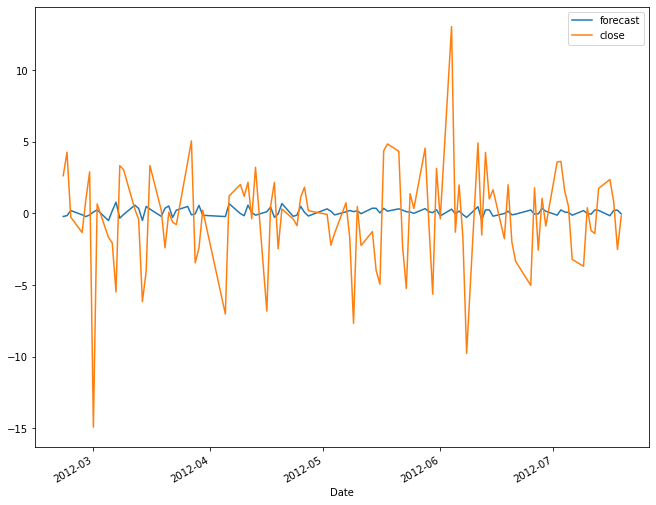

The root mean squared error is 3.5899270859590233.


In [21]:
model1=ARMA(diff1,order=(4,4)) #pq值取4
result1=model1.fit()
print(reslut1.summary())
result1.plot_predict(start=1000, end=1100)
plt.savefig('ARMA.png')
plt.show()
rmse = math.sqrt(mean_squared_error(diff1[1000:1101], result1.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

ARIMA模型（p,d,q）：d为差分阶数

ARIMA(1,1,1)
Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1

C:\Users\zhouteng\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\zhouteng\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 3159
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -8018.164
Method:                       css-mle   S.D. of innovations              3.059
Date:                Mon, 08 Feb 2021   AIC                          16056.328
Time:                        10:06:11   BIC                          16116.908
Sample:                             1   HQIC                         16078.061
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.747e-05   6.03e-05      0.622      0.534   -8.06e-05       0.000
ar.L1.D.close    -1.4886      0.235     -6.345      0.000      -1.948      -1.029
ar.L2.D.close    -1.3043      0.210     

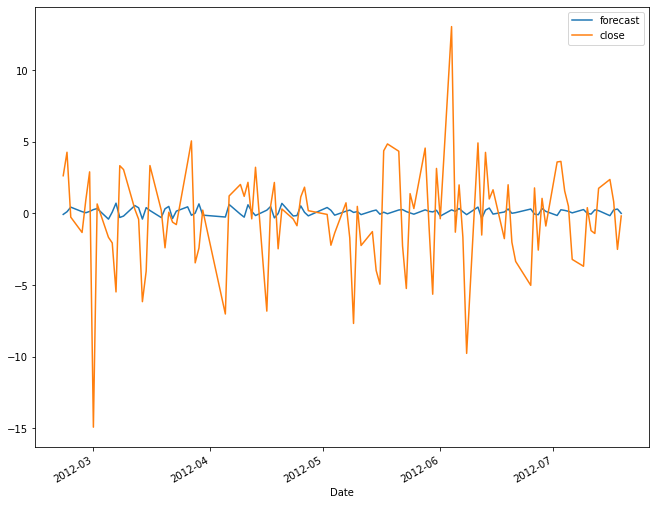

The root mean squared error is 4.327428165909563.


In [22]:
model_a=ARIMA(diff1,order=(4,1,4)) #pq值取4
result_a=model_a.fit()
print(reslut_a.summary())
result_a.plot_predict(start=1000, end=1100)
plt.savefig('ARIMA.png')
plt.show()
rmse_a = math.sqrt(mean_squared_error(diff1[1:], result_a.predict()))
print("The root mean squared error is {}.".format(rmse_a))

In [17]:
print(diff1[1000:1100])
print(result_a.predict(start=1000,end=1100))

Date
2012-02-22    2.63
2012-02-23    4.27
2012-02-24   -0.26
2012-02-27   -1.33
2012-02-28    0.95
              ... 
2012-07-12   -1.40
2012-07-13    1.75
2012-07-16    2.37
2012-07-17    0.82
2012-07-18   -2.51
Name: close, Length: 100, dtype: float64
Date
2012-02-22   -1.929349
2012-02-23   -2.513846
2012-02-24   -3.833844
2012-02-27    0.382422
2012-02-28    1.378897
                ...   
2012-07-13    1.594425
2012-07-16   -1.907595
2012-07-17   -2.125600
2012-07-18   -0.515064
2012-07-19    2.511934
Length: 101, dtype: float64


In [19]:
print(diff1)
print(result_a.predict())

Date
2008-01-10   -8.18
2008-01-11    2.98
2008-01-14    2.00
2008-01-15    3.70
2008-01-16   -7.91
              ... 
2020-12-29   -1.92
2020-12-30   -0.16
2020-12-31    1.28
2021-01-04    5.06
2021-01-05    0.00
Name: close, Length: 3160, dtype: float64
Date
2008-01-11    0.000037
2008-01-14   -5.833420
2008-01-15   -2.974636
2008-01-16   -3.228774
2008-01-17    6.339766
                ...   
2020-12-29   -0.617858
2020-12-30    1.819143
2020-12-31    0.282052
2021-01-04   -1.023384
2021-01-05   -5.086180
Length: 3159, dtype: float64
